# Programmin Assignment 1
## Question 1:  Implement Gradient Descent

In [1]:
from __future__ import division
import numpy as np
import math
# %load homework1
import pdb
import random
import pylab as pl
from scipy.optimize import fmin_bfgs

# X is an array of N data points (one dimensional for now), that is, NX1
# Y is a Nx1 column vector of data values
# order is the order of the highest order polynomial in the basis functions
def regressionPlot(X, Y, order, regressionFit):
    pl.plot(X.T.tolist()[0],Y.T.tolist()[0], 'gs')

    # You will need to write the designMatrix and regressionFit function

    # constuct the design matrix, the 0th column is just 1s.
    phi = designMatrix(X, order)
#     print "Phi", phi
    # compute the weight vector
    w = regressionFit(X, Y, phi)
    print 'w', w
    # produce a plot of the values of the function
    pts = [[p] for p in pl.linspace(min(X), max(X), 100)]
    Yp = pl.dot(w.T, designMatrix(pts, order).T)
    pl.plot(pts, Yp.tolist()[0])

def getData(name):
    data = pl.loadtxt(name)
    # Returns column matrices
    X = data[0:1].T
    Y = data[1:2].T
    return X, Y

def bishopCurveData():
    # y = sin(2 pi x) + N(0,0.3),
    return getData('curvefitting.txt')

def regressAData():
    return getData('regressA_train.txt')

def regressBData():
    return getData('regressB_train.txt')

def validateData():
    return getData('regress_validate.txt')



### 1.1 Gradient Descent

In [2]:
# Wrapper function to perform gradient descent on any objective function
def gradient_descent(gradient, init, step_size=0.01, train_x=None, train_y=None, \
                     convergence_criteria=0.0008, loss=None):
    ''' Gradient descent wrapper function
        `gradient` is a function that calculates gradient for the objective function
        `init` is the initial guess for parameters
        `step_size` is the learning rate
        `train` is train data if required
        `convergence_criteria` is the threshold for difference between two consecutive
                               iterations
    '''
    i = 0
    params, previous = init, init # initialize params
    diff = np.array([10]* len(init))
    while not all(diff < convergence_criteria):
        grad = gradient(params, train_x, train_y) # calculate gradient
        previous = np.copy(params)
        params -= step_size * grad
        diff = abs(params - previous)
        i += 1
        if loss:
            print "Loss", loss(params, train_x, train_y)
    print "Iterations", i
    return params

### 1.2 Test convex and non-convex functions' gradients

In [3]:
# Gradients for known functions
def bivariate_convex_gradient(params, *train):
    ''' Gradient for bivariate convex function: x^2 + xy + y^2 '''
    return np.array([(2 * params[0]) + params[1], (2 * params[1]) + params[0]])

def rosenbrock_gradient(params, *train):
    '''Gradient for non-convex Rosenbrock function: (1 - x)^2 + b(y - x^2)^2
       The global minima is at (1, 1)
    '''
    x = params[0]
    y = params[1]
    return np.array([-400 * x * (y - np.square(x)) - 2 * (1 - x), 200 * x * (y - np.square(x))])

# Tests
print "Non-convex, init guess 1:", gradient_descent(rosenbrock_gradient, init=[2, 2], step_size=0.0001, convergence_criteria=0.0000001)
print "convex, init guess 1:", gradient_descent(bivariate_convex_gradient, step_size=0.0001, init=[0.1, 0.3], convergence_criteria=0.0000001)
print "convex, init guess 2:", gradient_descent(bivariate_convex_gradient, step_size=0.0001, init=[1.99, 1.99], convergence_criteria=0.0000001)

Non-convex, init guess 1: Iterations 159959
[1.00124911 1.00250478]
convex, init guess 1: Iterations 46057
[-0.00099904  0.00099944]
convex, init guess 2: Iterations 28979
[0.00033317 0.00033317]


#### For convex and non-convex functions we run the tests above. The non-convex function finds its minima around (1, 1) which is the global minima of the function used. For other values, it diverges and throws errors. For the convex function, we show that the function always converges around (0, 0) regardless of the init guess.

### 1.3 Finite Difference

In [4]:
def finite_difference(objective, init, h=0.000000001, step_size=0.01, threshold=0.0008):
    ''' Given an objective function `objective` and initial parameter guess `init`, 
        `h`, `step_size` and convergence threshold `threshold`, calculate approximate
        derivative of the objective function using central difference.
    '''
    params, previous = init, init
    updates = np.copy(init)
    diff = np.array([10] * len(init))
    j = 0
    while not all(diff < threshold):
        for i in xrange(len(params)):
            params[i] += h
            fx_plus_h = objective(*params)
            params[i] -= (h + h)
            fx_minus_h = objective(*params)
            params[i] += h
            updates[i] = step_size * (fx_plus_h - fx_minus_h) / (2 * h)
        previous = np.copy(params)
        params -= updates
        diff = abs(params - previous)
        j += 1
    return params
    

In [5]:
finite_difference(lambda *params: params[0] ** 2 + params[0]*params[1] + params[1] ** 2, \
                  init=np.array([3., 8.]), step_size=0.01)

array([-0.07784757,  0.07814793])

#### Using finite difference for the same function used above, we get the same minima around (0, 0) which is what we expect.

## Question 2:  Linear Basis Function Regression

## 2.1 MLE for Linear Regression

In this section we use the analytical solution to Linear Regression and plot the results. We see identical results provided in the assignment and the weights are also similar to the table given.

In [6]:
X, Y = bishopCurveData()

def regression_mle(params, train_x, train_y):
    return np.matmul(np.matmul(np.linalg.inv(np.matmul(train_x.T, train_x)), train_x.T), train_y)

def designMatrix(X, order):
    mat = np.ones((len(X), order + 1))
    for i in xrange(1, order + 1):
        mat[:, i] = np.power(X, i).T
    return mat

def regression_mle_fit(X, Y, phi):
    return regression_mle(np.random.rand(phi.shape[1], 1), train_x=phi, train_y=Y)

w [[0.1862995]]


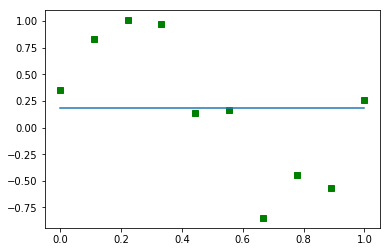

In [7]:
regressionPlot(X, Y, 0, regression_mle_fit)

w [[ 0.82021246]
 [-1.26782593]]


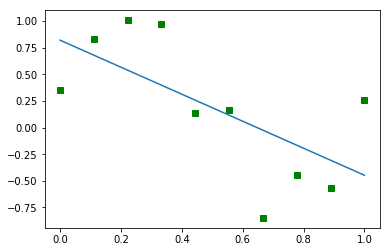

In [8]:
regressionPlot(X, Y, 1, regression_mle_fit)

w [[  0.31370273]
 [  7.98537103]
 [-25.42610224]
 [ 17.37407653]]


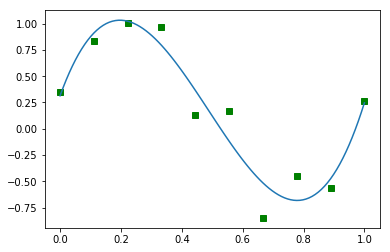

In [9]:
regressionPlot(X, Y, 3, regression_mle_fit)

w [[ 3.49512436e-01]
 [ 2.32326298e+02]
 [-5.32086773e+03]
 [ 4.85596769e+04]
 [-2.31598783e+05]
 [ 6.39931981e+05]
 [-1.06162004e+06]
 [ 1.04222515e+06]
 [-5.57590377e+05]
 [ 1.25180846e+05]]


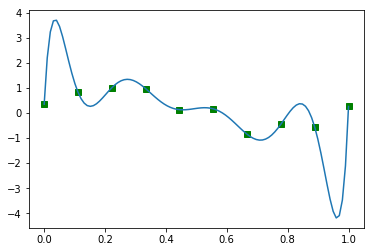

In [10]:
regressionPlot(X, Y, 9, regression_mle_fit)

## 2.2 SSE Derivative and SSE Error

In this section, using gradient descent linear regression is performed. After tuning the `step_size` and `convergence_criteria`, we see that for `convergence_criteria = 10 ^ -6` and `step_size = 0.1`. For these hyperparameters, we see almost identical values to analytical solution and hence the one given in assignment.

In [11]:
# Implementing SSE errors and SSE Derivative
def sse_gradient(params, train_x, train_y):
    ''' Gradient for SSE '''
    m = len(train_x)
    hypothesis = np.matmul(train_x, params)
    return (1./m) * np.sum((np.matmul((hypothesis - train_y).T, train_x)), axis=0).reshape(params.shape)

def sse(params, train_x, train_y):
    ''' Calculates SSE given `params`, `train_x` and `train_y`'''
    m = len(train_x)
    hypothesis = np.matmul(train_x, params)
    return (1./(2 * m)) * np.sum((np.square((hypothesis - train_y).T)), axis=1)

Iterations 46
w [[0.1863031]]


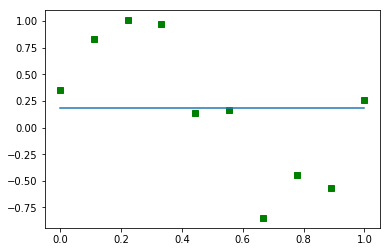

In [12]:
def regressionFit(X, Y, phi):
    return gradient_descent(sse_gradient, np.random.rand(phi.shape[1], 1), train_x=phi, train_y=Y, \
                            convergence_criteria=math.pow(10,-6), step_size = 0.2, loss=None) # Pass loss = sse for errors

# For M 
regressionPlot(X, Y, 0, regressionFit)

Iterations 622
w [[ 0.8201796 ]
 [-1.26776546]]


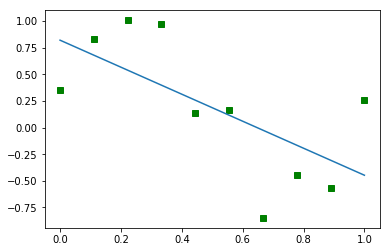

In [13]:
# For M = 1
regressionPlot(X, Y, 1, regressionFit)

Iterations 210875
w [[  0.31454821]
 [  7.97285152]
 [-25.39458305]
 [ 17.35364408]]


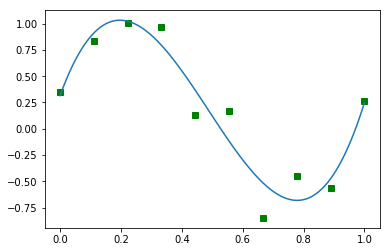

In [14]:
# For M = 3
regressionPlot(X, Y, 3, regressionFit)

## Question 3: Ridge Regression

Analytic gradient for ridge regression is implemented in the next section and we observe the same values given in the table and we see similar curve fits.

In [15]:
# Analytic solution for Ridge Regression
l = 0.002 # Lambda
def analytic_ridge_gradient(params, train_x, train_y):
    d = train_x.shape[1]
    I = np.identity(d)
    return np.matmul(np.matmul(np.linalg.inv(np.matmul(train_x.T, train_x) + (l * I)), train_x.T), train_y)

def ridge_sse(params, train_x, train_y):
    m = len(train_x)
    hypothesis = np.matmul(train_x, params)
    return (1./(2 * m)) * np.sum((np.square((hypothesis - train_y).T) + (l * np.matmul(params.T, params))), axis=1)

def ridgeFit(X, Y, phi):
    return analytic_ridge_gradient(np.random.rand(phi.shape[1], 1), train_x=phi, train_y=Y)

w [[0.18626225]]


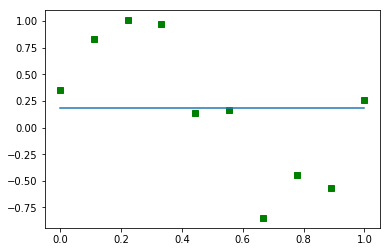

In [16]:
regressionPlot(X, Y, 0, regressionFit=ridgeFit)

w [[ 0.81840547]
 [-1.26453931]]


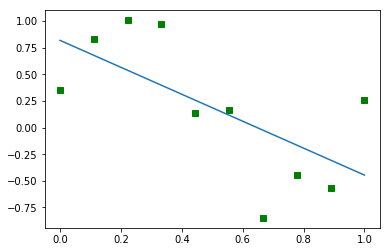

In [17]:
regressionPlot(X, Y, 1, regressionFit=ridgeFit)

w [[  0.6824839 ]
 [  2.43042598]
 [-11.35258044]
 [  8.21841296]]


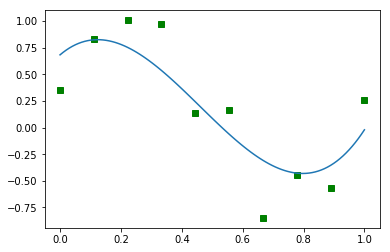

In [18]:
regressionPlot(X, Y, 3, regressionFit=ridgeFit)

w [[ 0.54809802]
 [ 2.82320236]
 [-6.39449047]
 [-2.54944238]
 [ 0.87437591]
 [ 2.30717801]
 [ 2.27083883]
 [ 1.40837758]
 [ 0.16904943]
 [-1.17683829]]


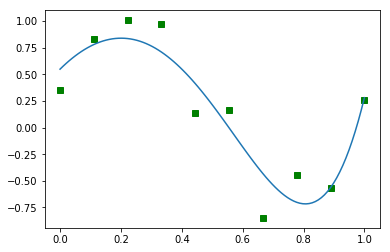

In [19]:
regressionPlot(X, Y, 9, regressionFit=ridgeFit)

### Different Values of Lambda and M

We attempt using different values for lambda. Increasing the value of lambda for `M=9` yields a shape resembling a hockey stick, which seems to be loosely fitting the data than expected. By decreasing the values of lambda, the fit seems to be better along with allowing better generalization. After attempting different values, we use `lambda = 0.002`.


## Ridge regression parameter optimization using Gradient Descent

Ridge regression is performed by using gradient descent for parameter optimization instead of the analytical solution. It can be observed that the weights are similar and we see similar curve fits. Although, tuning the parameters will lead better results and more closer to analytic gradient.

Iterations 32
w [[ 0.51837723]
 [-0.27502415]
 [-0.22770198]
 [-0.47796722]]


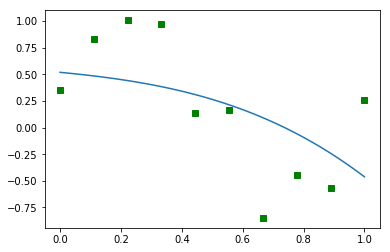

In [ ]:
def ridge_sse_gradient(params, train_x, train_y, l = 0.001):
    ''' Gradient for SSE ridge regression '''
    m = len(train_x)
    hypothesis = np.matmul(train_x, params)
    return (1./m) * np.sum((np.matmul((hypothesis - train_y).T, train_x)) + (l/m) * (params), axis=0).reshape(params.shape)

def regressionRidgeFit(X, Y, phi):
    return gradient_descent(ridge_sse_gradient, np.random.rand(phi.shape[1], 1), train_x=phi, train_y=Y, \
                            convergence_criteria=math.pow(10,-2), step_size = 0.1, loss=None) # Pass loss = sse for errors

regressionPlot(X, Y, 3, regressionFit=regressionRidgeFit)

## 3.2 Validation and model selection

For the purposes of validation, first we train the model on both `train` and `validation` datasets. Initially, `M = 1` and `lamdba = 0.001`. For these values, we observe that both datasets have a line fit, which is obvious for `M = 1`. But we observe that for training data set, the line is not a good fit since it might require higher order terms, we increase M to 5.

In [ ]:
X_train, Y_train = regressBData()
X_validation, Y_validation = validateData()
print X_train
M = 5
l = 0.001
# regressionPlot(X_train, Y_train, M, regressionFit=ridgeFit)

# pts = [[p] for p in pl.linspace(min(X), max(X), 100)]
# Yp = pl.dot(w.T, designMatrix(pts, order).T)
# pl.plot(pts, Yp.tolist()[0])

In [ ]:
regressionPlot(X_validation, Y_validation, M, regressionFit=ridgeFit)

Now we try different values of lambda. Increasing value of lambda seems to be helping the overfit problems for train set.

In [ ]:
l = 0.5
regressionPlot(X_train, Y_train, M, regressionFit=ridgeFit)

In [ ]:
regressionPlot(X_validation, Y_validation, M, regressionFit=ridgeFit)